# Introducing Fossil CO$_2$ Emissions Time-Series

Let's begin with just fossil and cement CO$_2$, from the CDIAC-FF. Data is given by year and by nation from 1751 through 2017:

- Journal article: https://essd.copernicus.org/articles/13/1667/2021/
- Data: https://zenodo.org/record/4281271

Let's start by getting the data with pandas, and doing some non-spatial processing!

- We'll review some of our pandas fundamentals here


In [107]:
#First get our basic libraries:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [108]:
#Let's load some data on carbon emissions by nation
#######

#Can naively try:
url_name = r'https://zenodo.org/record/4281271/files/nation.1751_2017.csv?download=1'

df = pd.read_csv(url_name)

In [109]:
#Let's see what we got:
df.head()

,Carbon Dioxide emissions from fossil fuel consumption and cement production by nation,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,"D. Gilfillan, G. Marland, T. Boden, and R. ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Carbon dioxide emissions by country from 1751 ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Nation,Year,Total CO2 emissions from fossil-fuels and ceme...,Emissions from solid fuel consumption,Emissions from liquid fuel consumption,Emissions from gas fuel consumption,Emissions from cement production,Emissions from gas flaring,Per capita CO2 emissions (metric tons of carbon),Emissions from bunker fuels (not included in t...
4,AFGHANISTAN,1949,4,4,0,0,0,.,.,0


#### Obviously some issues...

Let's download, and could also look at the .csv file in Excel

In [110]:
#To download:
#####

from urllib import request

#URL for file
url_name = r'https://zenodo.org/record/4281271/files/nation.1751_2017.csv?download=1'

#Local file name to save to
local_file = r'Data/nation.1751_2017.csv'

#Download and save
#request.urlretrieve(url_name, local_file)

In [111]:
#Looks like we have some front matter taking up 4 lines, so...
#Can either use header = 4
#OR
#skiprows = 4

#skiprows can also be a list, not just a number!

local_file = r'Data/nation.1751_2017.csv'

#Note: Much faster to read the local file, vs. the url
df = pd.read_csv(local_file, header = 4)

In [112]:
#Now:
df.head()

,Nation,Year,Total CO2 emissions from fossil-fuels and cement production (thousand metric tons of C),Emissions from solid fuel consumption,Emissions from liquid fuel consumption,Emissions from gas fuel consumption,Emissions from cement production,Emissions from gas flaring,Per capita CO2 emissions (metric tons of carbon),Emissions from bunker fuels (not included in the totals)
0,AFGHANISTAN,1949,4,4,0,0,0,.,.,0
1,AFGHANISTAN,1950,23,6,18,0,0,0,0,0
2,AFGHANISTAN,1951,25,7,18,0,0,0,0,0
3,AFGHANISTAN,1952,25,9,17,0,0,0,0,0
4,AFGHANISTAN,1953,29,10,18,0,0,0,0,0


In [113]:
#We can set different columns names on reading like so:
#######

name_list = ['Nation', 'Year', 'Total', 'Solid', 'Liquid', 'Gas', 'Cement', 'Flaring', 'Per_Capita', 'Bunker']

#Use header = 4, or somewhat more verbose:
df = pd.read_csv(local_file, skiprows = 5, header = None, names = name_list)

In [114]:
df

,Nation,Year,Total,Solid,Liquid,Gas,Cement,Flaring,Per_Capita,Bunker
0,AFGHANISTAN,1949,4,4,0,0,0,.,.,0
1,AFGHANISTAN,1950,23,6,18,0,0,0,0,0
2,AFGHANISTAN,1951,25,7,18,0,0,0,0,0
3,AFGHANISTAN,1952,25,9,17,0,0,0,0,0
4,AFGHANISTAN,1953,29,10,18,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
17923,ZIMBABWE,2013,3176,1919,1124,0,132,0,0.24,10
17924,ZIMBABWE,2014,3272,2110,1020,0,142,0,0.24,11
17925,ZIMBABWE,2015,3324,2193,991,0,140,0,0.24,23
17926,ZIMBABWE,2016,2953,1927,866,0,160,0,0.21,39


In [115]:
#Let's see what all the unique nations are:
################

display(df.Nation.unique())

array(['AFGHANISTAN ', 'ALBANIA ', 'ALGERIA ', 'ANDORRA ', 'ANGOLA ',
       'ANGUILLA ', 'ANTARCTIC FISHERIES ', 'ANTIGUA & BARBUDA ',
       'ARGENTINA ', 'ARMENIA ', 'ARUBA ', 'AUSTRALIA ', 'AUSTRIA ',
       'AZERBAIJAN ', 'BAHAMAS ', 'BAHRAIN ', 'BANGLADESH ', 'BARBADOS ',
       'BELARUS ', 'BELGIUM ', 'BELIZE ', 'BENIN ', 'BERMUDA ', 'BHUTAN ',
       'BONAIRE, SAINT EUSTATIUS, AND SABA ', 'BOSNIA & HERZEGOVINA ',
       'BOTSWANA ', 'BRAZIL ', 'BRITISH VIRGIN ISLANDS ',
       'BRUNEI (DARUSSALAM) ', 'BULGARIA ', 'BURKINA FASO ', 'BURUNDI ',
       'CAMBODIA ', 'CANADA ', 'CAPE VERDE ', 'CAYMAN ISLANDS ',
       'CENTRAL AFRICAN REPUBLIC ', 'CHAD ', 'CHILE ',
       'CHINA (MAINLAND) ', 'CHRISTMAS ISLAND ', 'COLOMBIA ', 'COMOROS ',
       'CONGO ', 'COOK ISLANDS ', 'COSTA RICA ', 'COTE D IVOIRE ',
       'CROATIA ', 'CUBA ', 'CURACAO ', 'CYPRUS ', 'CZECH REPUBLIC ',
       'CZECHOSLOVAKIA ', 'DEMOCRATIC PEOPLE S REPUBLIC OF KOREA ',
       'DEMOCRATIC REPUBLIC OF THE CONGO (FOR

In [116]:
#And how many are there?

len(df.Nation.unique())

259

In [117]:
#And now many are there in 2017: This will come up in a moment
###

len(df.loc[df.Year == 2017].Nation.unique())

218

In [118]:
#Note the names above: Trailing whitespace, let's strip off...

#We can strip the leading and trailing whitespace from our Nation names: str.strip()
#Use lstrip() and rstrip() for just leading/following:

df.Nation = df.Nation.str.strip()

#And check out an exmaple:
df.loc[df['Nation'] == 'UNITED STATES OF AMERICA'].head()

,Nation,Year,Total,Solid,Liquid,Gas,Cement,Flaring,Per_Capita,Bunker
16863,UNITED STATES OF AMERICA,1800,69,69,0,0,0,.,.,0
16864,UNITED STATES OF AMERICA,1801,73,73,0,0,0,.,.,0
16865,UNITED STATES OF AMERICA,1802,79,79,0,0,0,.,.,0
16866,UNITED STATES OF AMERICA,1803,81,81,0,0,0,.,.,0
16867,UNITED STATES OF AMERICA,1804,91,91,0,0,0,.,.,0


Note that it looks like we have a lot of missing data...
And note our data types:

In [119]:
#Get our data types:
####
df.dtypes

Nation        object
Year           int64
Total          int64
Solid         object
Liquid        object
Gas           object
Cement         int64
Flaring       object
Per_Capita    object
Bunker         int64
dtype: object

In [120]:
#There are a few ways to deal with this...

#First note what these values are:
display(df.iloc[0,8])

#And note that there is a space!

'. '

In [121]:
#One good option is to reload:
#And set na_values argument
#####

name_list = ['Nation', 'Year', 'Total', 'Solid', 'Liquid', 'Gas', 'Cement', 'Flaring', 'Per_Capita', 'Bunker']

df = pd.read_csv(local_file, header = 4, names = name_list, na_values = '. ')

df.head()

,Nation,Year,Total,Solid,Liquid,Gas,Cement,Flaring,Per_Capita,Bunker
0,AFGHANISTAN,1949,4,4.0,0.0,0.0,0,NaN,NaN,0
1,AFGHANISTAN,1950,23,6.0,18.0,0.0,0,0.0,0.0,0
2,AFGHANISTAN,1951,25,7.0,18.0,0.0,0,0.0,0.0,0
3,AFGHANISTAN,1952,25,9.0,17.0,0.0,0,0.0,0.0,0
4,AFGHANISTAN,1953,29,10.0,18.0,0.0,0,0.0,0.0,0


In [122]:
#Now our types?

df.dtypes

Nation         object
Year            int64
Total           int64
Solid         float64
Liquid        float64
Gas           float64
Cement          int64
Flaring       float64
Per_Capita    float64
Bunker          int64
dtype: object

In [123]:
#We can also specify types when loading:
#Use a dictionary:
#######

df = pd.read_csv(local_file, header = 4, names = name_list, na_values = '. ',
                 dtype = {'Total': np.float64, 'Cement': np.float64, 'Bunker': np.float64})

df.dtypes

Nation         object
Year            int64
Total         float64
Solid         float64
Liquid        float64
Gas           float64
Cement        float64
Flaring       float64
Per_Capita    float64
Bunker        float64
dtype: object

In [124]:
#Could also force the columns to a numeric type AFTER loading
###

df = pd.read_csv(local_file, header = 4, names = name_list)

#This will fail: Can't convert a string
df.Flaring.astype(np.float64)

ValueError: could not convert string to float: '. '

In [125]:
#This will work: Use pd.to_numeric function
#Set errors = coerce so that if invalid parsing, give a NaN
df.Flaring = pd.to_numeric(df.Flaring, errors = 'coerce')

df.head()

,Nation,Year,Total,Solid,Liquid,Gas,Cement,Flaring,Per_Capita,Bunker
0,AFGHANISTAN,1949,4,4,0,0,0,NaN,.,0
1,AFGHANISTAN,1950,23,6,18,0,0,0.0,0,0
2,AFGHANISTAN,1951,25,7,18,0,0,0.0,0,0
3,AFGHANISTAN,1952,25,9,17,0,0,0.0,0,0
4,AFGHANISTAN,1953,29,10,18,0,0,0.0,0,0


In [126]:
#To convert all the columns we want, we can use apply or applymap:
##########
convert_cols = ['Total', 'Solid', 'Liquid', 'Gas', 'Cement', 'Flaring', 'Per_Capita', 'Bunker']

#Either apply or applymap will work here
df[convert_cols] = df[convert_cols].apply(pd.to_numeric, errors='coerce')

df.head()

,Nation,Year,Total,Solid,Liquid,Gas,Cement,Flaring,Per_Capita,Bunker
0,AFGHANISTAN,1949,4,4.0,0.0,0.0,0,NaN,NaN,0
1,AFGHANISTAN,1950,23,6.0,18.0,0.0,0,0.0,0.0,0
2,AFGHANISTAN,1951,25,7.0,18.0,0.0,0,0.0,0.0,0
3,AFGHANISTAN,1952,25,9.0,17.0,0.0,0,0.0,0.0,0
4,AFGHANISTAN,1953,29,10.0,18.0,0.0,0,0.0,0.0,0


In [127]:
#Note: If all we wanted was Nation, Year, Total, and Per_Capita:
#Add usecols: Note we can use the new names

df = pd.read_csv(local_file, skiprows = 5, header = None, names = name_list,
                 usecols = ['Nation', 'Year', 'Total', 'Per_Capita'], na_values = '. ')

#Could also use column integer index:
#df = pd.read_csv(local_file, skiprows = 5, header = None, names = name_list,
#                 usecols = [0, 1, 2, 8], na_values = '. ')

In [128]:
df.head()

,Nation,Year,Total,Per_Capita
0,AFGHANISTAN,1949,4,NaN
1,AFGHANISTAN,1950,23,0.0
2,AFGHANISTAN,1951,25,0.0
3,AFGHANISTAN,1952,25,0.0
4,AFGHANISTAN,1953,29,0.0


#### Filter the missing data

Our main NA handling methods:

- `dropna()`
- `fillna()`
- `isnull()`
- `notnull()`

In [129]:
#Let's define a function to reload our data and do some basic cleaning:

def get_carbon_df():
    local_file = r'Data/nation.1751_2017.csv'
    
    name_list = ['Nation', 'Year', 'Total', 'Solid', 'Liquid', 'Gas', 'Cement', 'Flaring', 'Per_Capita', 'Bunker']
    new_df = pd.read_csv(local_file, header = 4, names = name_list, na_values = '. ')
    
    #Throw in stripping the whitespace from the names too:
    new_df.Nation = new_df.Nation.str.strip()
    
    return new_df


In [131]:
#Once again, reload:
df = get_carbon_df()

#We managed to get NaNs where the data was missing, can we filter out more?
#Yes, but first:

#This snippet gets the rows where anything is null:
display(df[df.isnull().any(axis=1)]);

#How many entries have a NaN?
len(df[df.isnull().any(axis=1)])

,Nation,Year,Total,Solid,Liquid,Gas,Cement,Flaring,Per_Capita,Bunker
0,AFGHANISTAN,1949,4,4.0,0.0,0.0,0,NaN,NaN,0
69,ALBANIA,1933,2,0.0,2.0,0.0,0,NaN,NaN,0
70,ALBANIA,1934,2,0.0,2.0,0.0,0,NaN,NaN,0
71,ALBANIA,1935,5,0.0,5.0,0.0,0,NaN,NaN,0
72,ALBANIA,1936,35,0.0,34.0,0.0,1,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...
17869,ZIMBABWE,1945,1218,1209.0,0.0,0.0,9,NaN,NaN,0
17870,ZIMBABWE,1946,1177,1168.0,0.0,0.0,9,NaN,NaN,0
17871,ZIMBABWE,1947,1102,1092.0,0.0,0.0,10,NaN,NaN,0
17872,ZIMBABWE,1948,1238,1228.0,0.0,0.0,10,NaN,NaN,0


5420

In [132]:
#We can either drop any rows with NAs:
df2 = df.dropna()

print(len(df))

print(len(df2))

17928
12508


In [133]:
#Or fill them with something, like 0, if that seems appropriate:
df.fillna(0)

,Nation,Year,Total,Solid,Liquid,Gas,Cement,Flaring,Per_Capita,Bunker
0,AFGHANISTAN,1949,4,4.0,0.0,0.0,0,0.0,0.00,0
1,AFGHANISTAN,1950,23,6.0,18.0,0.0,0,0.0,0.00,0
2,AFGHANISTAN,1951,25,7.0,18.0,0.0,0,0.0,0.00,0
3,AFGHANISTAN,1952,25,9.0,17.0,0.0,0,0.0,0.00,0
4,AFGHANISTAN,1953,29,10.0,18.0,0.0,0,0.0,0.00,0
...,...,...,...,...,...,...,...,...,...,...
17923,ZIMBABWE,2013,3176,1919.0,1124.0,0.0,132,0.0,0.24,10
17924,ZIMBABWE,2014,3272,2110.0,1020.0,0.0,142,0.0,0.24,11
17925,ZIMBABWE,2015,3324,2193.0,991.0,0.0,140,0.0,0.24,23
17926,ZIMBABWE,2016,2953,1927.0,866.0,0.0,160,0.0,0.21,39


In [134]:
#We can also fill different columns with different values:
#Use a dictionary

df.fillna({'Per_Capita': 999999, 'Flaring':-888})

,Nation,Year,Total,Solid,Liquid,Gas,Cement,Flaring,Per_Capita,Bunker
0,AFGHANISTAN,1949,4,4.0,0.0,0.0,0,-888.0,999999.00,0
1,AFGHANISTAN,1950,23,6.0,18.0,0.0,0,0.0,0.00,0
2,AFGHANISTAN,1951,25,7.0,18.0,0.0,0,0.0,0.00,0
3,AFGHANISTAN,1952,25,9.0,17.0,0.0,0,0.0,0.00,0
4,AFGHANISTAN,1953,29,10.0,18.0,0.0,0,0.0,0.00,0
...,...,...,...,...,...,...,...,...,...,...
17923,ZIMBABWE,2013,3176,1919.0,1124.0,0.0,132,0.0,0.24,10
17924,ZIMBABWE,2014,3272,2110.0,1020.0,0.0,142,0.0,0.24,11
17925,ZIMBABWE,2015,3324,2193.0,991.0,0.0,140,0.0,0.24,23
17926,ZIMBABWE,2016,2953,1927.0,866.0,0.0,160,0.0,0.21,39


#### Back to dropping...

In [135]:
#We can also restrict ourself to only dropping rows that are *all* NaN:
########

#'all' vs. 'any'
df2 = df.dropna(how = 'all')

print(len(df))

print(len(df2))

17928
17928


In [136]:
#Or if specific columns have NaNs:
########

df2 = df.dropna(subset = ['Solid', 'Flaring'])

print(len(df2))

13158


#### Drop columns with NaNs?

In [137]:
#Set our axis to 1 and we will drop columns that contain any NaNs:
df2 = df.dropna(axis = 1) #, how = 'all') #, subset=[0]

df2.head()

,Nation,Year,Total,Cement,Bunker
0,AFGHANISTAN,1949,4,0,0
1,AFGHANISTAN,1950,23,0,0
2,AFGHANISTAN,1951,25,0,0
3,AFGHANISTAN,1952,25,0,0
4,AFGHANISTAN,1953,29,0,0


In [138]:
#Re-define here for clarity:
###########

#Let's define a function to reload our data and do some basic cleaning:

def get_carbon_df():
    local_file = r'Data/nation.1751_2017.csv'
    
    name_list = ['Nation', 'Year', 'Total', 'Solid', 'Liquid', 'Gas', 'Cement', 'Flaring', 'Per_Capita', 'Bunker']
    new_df = pd.read_csv(local_file, header = 4, names = name_list, na_values = '. ')
    
    #Throw in stripping the whitespace from the names too:
    new_df.Nation = new_df.Nation.str.strip()
    
    return new_df

### More `groupby` on Emissions!

Recall that we:

1. *Split* DataFrame into groups based on one or more *keys*, along a particular axis (rows, `axis = 0`; or colums, `axis = 1`)
2. Apply a function to each group, producing a new value
3. Comine results into a new object

<img src="split_apply_flow.jpg" alt="drawing" style="width:450px;"/>


In [139]:
#Grab the data again, and remind ourselves
df = get_carbon_df()

df.head()

,Nation,Year,Total,Solid,Liquid,Gas,Cement,Flaring,Per_Capita,Bunker
0,AFGHANISTAN,1949,4,4.0,0.0,0.0,0,NaN,NaN,0
1,AFGHANISTAN,1950,23,6.0,18.0,0.0,0,0.0,0.0,0
2,AFGHANISTAN,1951,25,7.0,18.0,0.0,0,0.0,0.0,0
3,AFGHANISTAN,1952,25,9.0,17.0,0.0,0,0.0,0.0,0
4,AFGHANISTAN,1953,29,10.0,18.0,0.0,0,0.0,0.0,0


In [140]:
#We can group by nation, get sum of emissions
df_grouped = df.groupby(by = 'Nation')

df_grouped

In [141]:
#Get a DataFrame of just the sums:
df_sums = df_grouped.sum()

#Note that Year and Per_Capita are now meaningless
display(df_sums.head())

,Year,Total,Solid,Liquid,Gas,Cement,Flaring,Per_Capita,Bunker
Nation,,,,,,,,,
AFGHANISTAN,136827,43790,11332.0,24874.0,5249.0,709,1625.0,2.32,320
ALBANIA,167875,74103,17926.0,47119.0,4383.0,4679,0.0,27.28,490
ALGERIA,211998,1121349,30826.0,391192.0,489710.0,53553,156079.0,41.12,30038
ANDORRA,56098,3714,0.0,3714.0,0.0,0,0.0,51.91,0
ANGOLA,134878,173706,437.0,84370.0,9985.0,6613,72307.0,10.68,18431


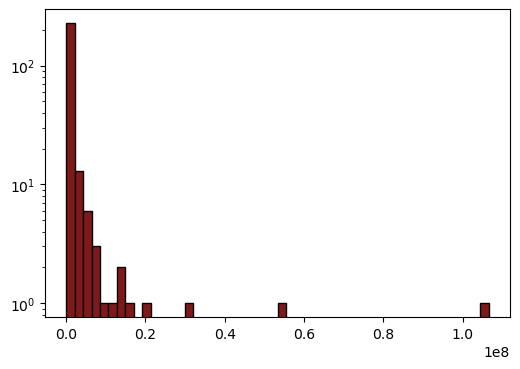

In [142]:
#Plot the Total *cumulative* emissions histogram: Plot on log scale: y
####

df_sums['Total'].hist(bins = 50, edgecolor='black', facecolor=(.5, .1, .1), grid=False, log=True, figsize=(6,4));

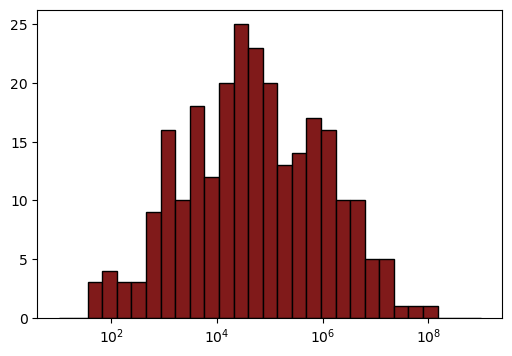

In [143]:
#Log scale: x
####

fig, ax1 = plt.subplots(1,1, figsize=(8, 6))

my_bins = np.logspace(1,9,30)
df_sums['Total'].hist(ax=ax1, bins = my_bins, edgecolor='black', facecolor=(.5, .1, .1), grid=False, log=False, figsize=(6,4));

#Set scale to LOG:
ax1.set_xscale('log')

In [145]:
#How much fossil +cement carbon has been emmitted by all countries since 1751: At least from a nation-wise sum?
#In Billion Metric Tons: Divide by 1e6
#Note that the following is a Series object:
df_sums.sum() / 1e6


Year           35.204350
Total         416.344888
Solid         202.353533
Liquid        139.231103
Gas            60.639831
Cement         10.479518
Flaring         3.641018
Per_Capita      0.014581
Bunker         10.772314
dtype: float64

In [146]:
#Note: Total column DOES NOT include bunker fuels: these are for international transport and often not assigned to a nation
#CDIAC gives bunker fuel for nation of origin, but doesn't include in total column

#Add both:
np.sum(df_sums.sum().iloc[[1,8]]) / 1e6

427.117202

In [147]:
#Get the top cumulative emitters:
#Divide by 1e6 to convert to billion metric tons
######

df_sums.sort_values(by = ['Total'], ascending=False).head(20) / 1e6

#Get number one:
#As DataFrame:
#df_sums.sort_values(by = ['Total'], ascending=False).iloc[[0]]

#Name only:
#df_sums.sort_values(by = ['Total'], ascending=False).index[0]

,Year,Total,Solid,Liquid,Gas,Cement,Flaring,Per_Capita,Bunker
Nation,,,,,,,,,
UNITED STATES OF AMERICA,0.416053,106.580008,46.225736,40.114766,19.227174,0.712535,0.299800,0.000335,1.675645
CHINA (MAINLAND),0.229201,54.457915,42.327190,7.651261,1.207374,3.263736,0.008355,0.000044,0.191076
USSR,0.268914,30.535488,15.021732,9.801230,5.063003,0.501848,0.147678,0.000000,0.153234
UNITED KINGDOM,0.503028,20.811590,15.436727,3.456718,1.727271,0.135539,0.055331,0.000181,0.493008
JAPAN,0.134878,15.608275,4.978876,8.563018,1.543446,0.522576,0.000364,0.000130,0.558742
GERMANY,0.343803,13.335524,9.799003,2.213018,1.196820,0.119537,0.007143,0.000073,0.210808
INDIA,0.289408,13.215139,8.915519,3.229505,0.477056,0.549068,0.043996,0.000013,0.090048
RUSSIAN FEDERATION,0.052117,11.858257,3.217171,2.653961,5.703969,0.143654,0.139507,0.000082,0.144994
FRANCE (INCLUDING MONACO),0.401614,9.956002,5.074903,3.791904,0.886101,0.189929,0.013162,0.000125,0.310923


### Total Emissions by Year

In [149]:
df = get_carbon_df()

df_total = df.groupby(by = ['Year']).sum()
df_total.tail()

,Total,Solid,Liquid,Gas,Cement,Flaring,Per_Capita,Bunker
Year,,,,,,,,
2013,9033600,4013729.0,2781516.0,1797649.0,377330,63379.0,297.76,304790
2014,9104412,4018666.0,2824109.0,1811197.0,385021,65418.0,299.24,304463
2015,9099921,3936278.0,2865217.0,1850686.0,382561,65184.0,295.93,315134
2016,9081143,3855380.0,2863167.0,1902787.0,390443,69359.0,289.83,323275
2017,9231495,3880089.0,2937450.0,1953389.0,384298,76256.0,292.41,339700


In [150]:
#Reset the index for plotting
df_total = df_total.reset_index()


In [151]:
df_total

,Year,Total,Solid,Liquid,Gas,Cement,Flaring,Per_Capita,Bunker
0,1751,2552,2552.0,0.0,0.0,0,0.0,0.00,0
1,1752,2553,2553.0,0.0,0.0,0,0.0,0.00,0
2,1753,2553,2553.0,0.0,0.0,0,0.0,0.00,0
3,1754,2554,2554.0,0.0,0.0,0,0.0,0.00,0
4,1755,2555,2555.0,0.0,0.0,0,0.0,0.00,0
...,...,...,...,...,...,...,...,...,...
262,2013,9033600,4013729.0,2781516.0,1797649.0,377330,63379.0,297.76,304790
263,2014,9104412,4018666.0,2824109.0,1811197.0,385021,65418.0,299.24,304463
264,2015,9099921,3936278.0,2865217.0,1850686.0,382561,65184.0,295.93,315134
265,2016,9081143,3855380.0,2863167.0,1902787.0,390443,69359.0,289.83,323275


In [152]:
#Also, let's convert to a datetime
###########

df_total['Year'] = pd.to_datetime(df_total['Year'].values.astype(str), format="%Y")

In [153]:
df_total['Year']

0     1751-01-01
1     1752-01-01
2     1753-01-01
3     1754-01-01
4     1755-01-01
         ...    
262   2013-01-01
263   2014-01-01
264   2015-01-01
265   2016-01-01
266   2017-01-01
Name: Year, Length: 267, dtype: datetime64[ns]

<AxesSubplot: xlabel='Year'>

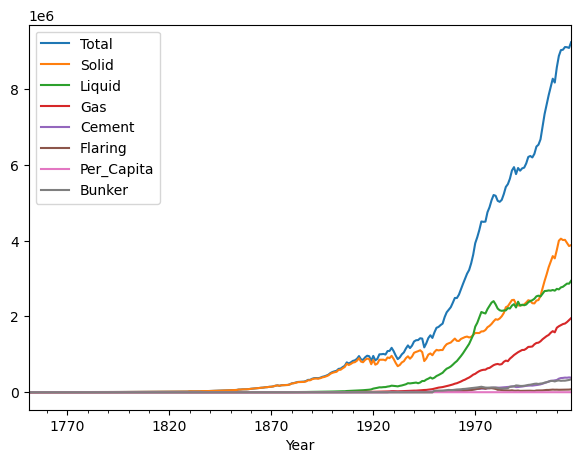

In [154]:
#And plot:
df_total.plot(x = 'Year', figsize=(7,5))

<AxesSubplot: xlabel='Year'>

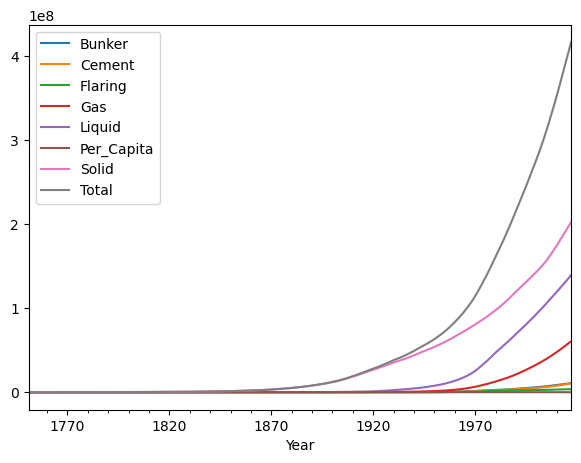

In [155]:
#And cumulative emissions:

#One way:
#Do cumulative sum on everything not year:
df_cumulative = df_total[df_total.columns.difference(['Year'])].cumsum()

#Grab the years again
df_cumulative['Year'] = df_total['Year']

#Plot
df_cumulative.plot(x = 'Year', figsize=(7,5))

### Cumulative Emissions over Time, and *By Nation*

Let's get the running total, i.e. cumulative sum, for each country over time. If we add all this up, we should get the grand running total...

#### Cumulative emissions by Nation

In [156]:
#Grab our dataframe again, just to be safe
df = get_carbon_df()

In [157]:
#The following bit of code with groupby Nation will take cumulative sum down the years:
df_cumulative = df.copy()

#df_cumulative Per_Capita: Doesn't make sense for a cumulative sum
df_cumulative.drop(columns = 'Per_Capita', inplace=True)


#Convert these
convert_cols = ['Total', 'Solid', 'Liquid', 'Gas', 'Cement', 'Flaring', 'Bunker']

#Note we preserve the Year, doing this
#Also note the division by 1e6
df_cumulative[convert_cols] = df.groupby(by = ['Nation'])[convert_cols].cumsum() / 1e6


In [158]:
display(df_cumulative.head())

,Nation,Year,Total,Solid,Liquid,Gas,Cement,Flaring,Bunker
0,AFGHANISTAN,1949,0.000004,0.000004,0.000000,0.0,0.0,NaN,0.0
1,AFGHANISTAN,1950,0.000027,0.000010,0.000018,0.0,0.0,0.0,0.0
2,AFGHANISTAN,1951,0.000052,0.000017,0.000036,0.0,0.0,0.0,0.0
3,AFGHANISTAN,1952,0.000077,0.000026,0.000053,0.0,0.0,0.0,0.0
4,AFGHANISTAN,1953,0.000106,0.000036,0.000071,0.0,0.0,0.0,0.0


<AxesSubplot: xlabel='Year'>

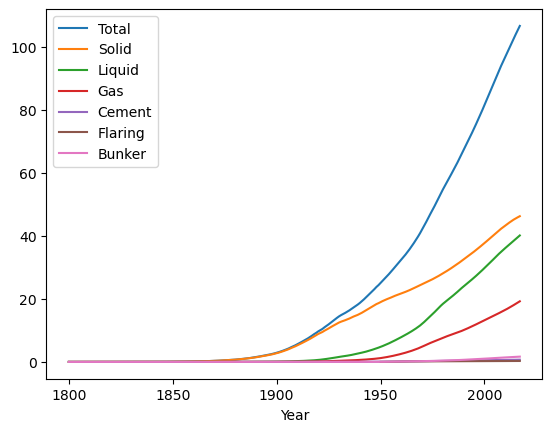

In [159]:
#Plot the results for the US:
df_cumulative.loc[df_cumulative['Nation'] == 'UNITED STATES OF AMERICA'].plot(x = 'Year')

#Looks good so far...

#### Global cumulative emissions by year

In [160]:
#Let's group by year and sum, to get total global emissions!:
########

df_world = df_cumulative.groupby(by = 'Year').sum()

#See what we got: Note the new index is Year
df_world

,Total,Solid,Liquid,Gas,Cement,Flaring,Bunker
Year,,,,,,,
1751,0.002552,0.002552,0.000000,0.000000,0.000000,0.000000,0.000000
1752,0.005105,0.005105,0.000000,0.000000,0.000000,0.000000,0.000000
1753,0.007658,0.007658,0.000000,0.000000,0.000000,0.000000,0.000000
1754,0.010212,0.010212,0.000000,0.000000,0.000000,0.000000,0.000000
1755,0.012767,0.012767,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...
2013,332.128498,159.877801,113.578363,47.335730,8.129217,3.207513,8.925039
2014,341.232910,163.896467,116.402472,49.146927,8.514238,3.272931,9.229502
2015,350.332831,167.832745,119.267689,50.997613,8.896799,3.338115,9.544636


In [161]:
#Reset index (if we like):
df_world = df_world.reset_index()

<AxesSubplot: xlabel='Year'>

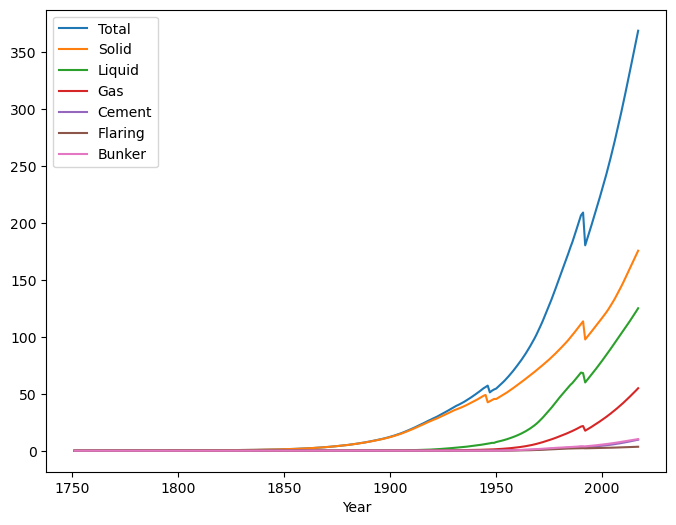

In [162]:
#And plot:
#Note we have some very odd points where the cumulative sums go down:

df_world.plot(x = 'Year', figsize=(8,6))

#### Why the odd time-series?

- Between 1751, many countries have come in and out of existence

- Emissions only tracked for a handful of countries back to 1751

- Especially notable points: Post-WWI, Post-WWII, era of African Independence (circa 1960), and the breakup of the former Soviet Union (1988-1991)

How to resolve?

1. Simpler method is to group initial DataFrame by year and sum


2. We can add years 1751 to 2017 for every country in our dataframe: More flexible for other grouping operations, etc. we might be interested in

#### Aside: Change in countries by year...

We won't emphasize this, but we can interrogate our data as follows:

- Let's determine the change in unique countries year-to-year...

In [163]:
#Total countries in each year:
def total_unique(x):
    return len(np.unique(x))
    
df_year = df.groupby(by=['Year'])

num_countries = df_year.Nation.apply(total_unique)


Text(0, 0.5, 'Total countries')

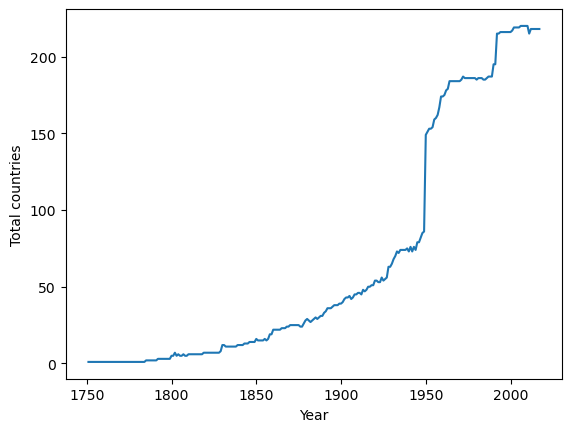

In [164]:
#Total countries in any given year:
num_countries.plot()
plt.ylabel('Total countries')

In [165]:
#Will get the change in unique countries:
########

#First, get all the unique counties in each year:
def all_unique(x):
    return (np.unique(x))
    
df_year = df.groupby(by=['Year'])

counties_by_year = df_year.Nation.apply(all_unique)

In [166]:
#Get number of countries and changes in countries:

#As lists:
counties_by_year_base = [list(i) for i in list(counties_by_year)]
counties_by_year_shift = [list(i) if type(i) != float else [] for i in list(counties_by_year.shift(1))]


In [167]:
#Get number lost year to year
num_lost = [sum([j not in counties_by_year_base[i] for j in counties_by_year_shift[i]]) for i in range(len(counties_by_year_shift))]
         
#Get number gained year to year
num_gained = [sum([j not in counties_by_year_shift[i] for j in counties_by_year_base[i]]) for i in range(len(counties_by_year_shift))]

#Also, number common to each year: Won't use further but nice to know
num_common = [len(set(counties_by_year_base[i]).intersection(set(counties_by_year_shift[i]))) for i in range(len(counties_by_year_base))]

Text(0, 0.5, 'Number of Countries')

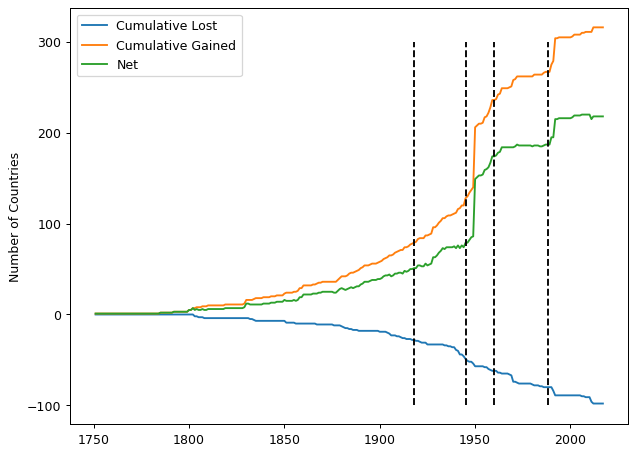

In [168]:
#Plot cumulative losses and gains:
########

fig, ax1 = plt.subplots(1,1, figsize=(8, 6), dpi=90)

ax1.plot(range(1751,2018), -np.array(num_lost).cumsum(), label='Cumulative Lost')
ax1.plot(range(1751,2018), np.array(num_gained).cumsum(), label='Cumulative Gained')

ax1.plot(range(1751,2018), np.array(num_gained).cumsum() - np.array(num_lost).cumsum(), label='Net')

ax1.legend()
#Some notable points:
ax1.vlines([1918, 1945, 1960, 1988], -100, 300, linestyles='--', colors='black')

ax1.set_ylabel('Number of Countries')

### Back to resolving emissions...

#### 1: Groupby year and sum()/cumsum()

In [172]:
#1 First, let us group by year and take the sum/cumulative sum:

df_world = df.groupby(by = 'Year').sum().cumsum() / 1e6

df_world

,Total,Solid,Liquid,Gas,Cement,Flaring,Per_Capita,Bunker
Year,,,,,,,,
1751,0.002552,0.002552,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1752,0.005105,0.005105,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1753,0.007658,0.007658,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1754,0.010212,0.010212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1755,0.012767,0.012767,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
2013,379.827917,186.663120,127.741160,53.121772,8.937195,3.364801,0.013403,9.489742
2014,388.932329,190.681786,130.565269,54.932969,9.322216,3.430219,0.013702,9.794205
2015,398.032250,194.618064,133.430486,56.783655,9.704777,3.495403,0.013998,10.109339


<AxesSubplot: xlabel='Year'>

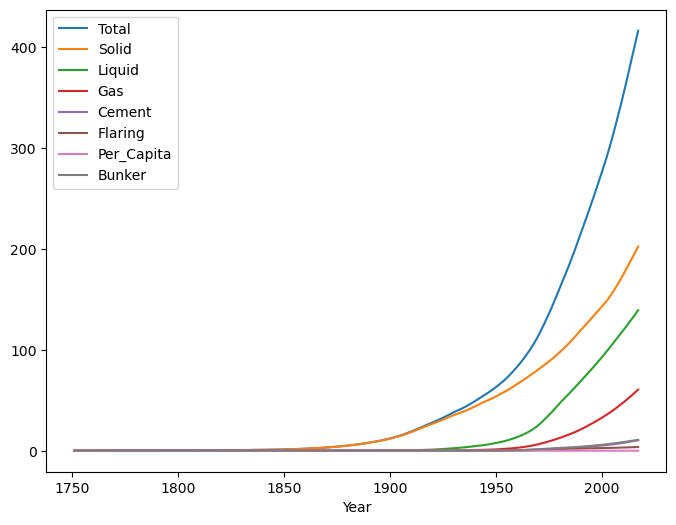

In [173]:
#First reset our index for plotting:
df_world = df_world.reset_index()

#And plot: Hurray, it works!
df_world.plot(x = 'Year', figsize=(8,6))

#### 2: Fill in missing years for all countries

In [174]:
# Can we get 0s for our missing dates?
# There's probably a more elegant solution, but let's get hacking...

#Will make a second dataframe to merge with:
########
num_years = 2017 - 1751 + 1

#Get our country names:

#Can do with list comprehension and unpacking, a little complicated...
#country_names = [[i]*num_years for i in df.Nation.unique()]
#country_names = [i for sublist in country_names for i in sublist]

#Or, less compactly:
country_names = []
for i in df.Nation.unique():
    country_names.extend([i]*num_years)

#Now get year_list and make our dataframe for merging...
num_nations = len(df.Nation.unique())

#Repeated year list:
year_list = list(range(1751,2018))*num_nations

#Our dataframe:
df2 = pd.DataFrame({"Nation":country_names, "Year":list(range(1751,2018))*num_nations})
df2
                

,Nation,Year
0,AFGHANISTAN,1751
1,AFGHANISTAN,1752
2,AFGHANISTAN,1753
3,AFGHANISTAN,1754
4,AFGHANISTAN,1755
...,...,...
69148,ZIMBABWE,2013
69149,ZIMBABWE,2014
69150,ZIMBABWE,2015
69151,ZIMBABWE,2016


In [175]:
#And merge!
#Note we merge to the RIGHT

df = df.merge(df2, on=['Nation', 'Year'], how='right')

In [176]:
#Behold many a NaN
df

,Nation,Year,Total,Solid,Liquid,Gas,Cement,Flaring,Per_Capita,Bunker
0,AFGHANISTAN,1751,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFGHANISTAN,1752,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFGHANISTAN,1753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFGHANISTAN,1754,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFGHANISTAN,1755,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
69148,ZIMBABWE,2013,3176.0,1919.0,1124.0,0.0,132.0,0.0,0.24,10.0
69149,ZIMBABWE,2014,3272.0,2110.0,1020.0,0.0,142.0,0.0,0.24,11.0
69150,ZIMBABWE,2015,3324.0,2193.0,991.0,0.0,140.0,0.0,0.24,23.0
69151,ZIMBABWE,2016,2953.0,1927.0,866.0,0.0,160.0,0.0,0.21,39.0


In [177]:
#Can fill with zeros:
df = df.fillna(0)

df

,Nation,Year,Total,Solid,Liquid,Gas,Cement,Flaring,Per_Capita,Bunker
0,AFGHANISTAN,1751,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
1,AFGHANISTAN,1752,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
2,AFGHANISTAN,1753,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
3,AFGHANISTAN,1754,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
4,AFGHANISTAN,1755,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...
69148,ZIMBABWE,2013,3176.0,1919.0,1124.0,0.0,132.0,0.0,0.24,10.0
69149,ZIMBABWE,2014,3272.0,2110.0,1020.0,0.0,142.0,0.0,0.24,11.0
69150,ZIMBABWE,2015,3324.0,2193.0,991.0,0.0,140.0,0.0,0.24,23.0
69151,ZIMBABWE,2016,2953.0,1927.0,866.0,0.0,160.0,0.0,0.21,39.0


In [178]:
#Once again, take the cumulative sums: Repeat of previous code
##############################################################

df_cumulative = df.copy()

#df_cumulative Per_Capita: Doesn't make sense to cumulative sum
df_cumulative.drop(columns = 'Per_Capita', inplace=True)

convert_cols = ['Total', 'Solid', 'Liquid', 'Gas', 'Cement', 'Flaring', 'Bunker']

#groupby and preserve year
df_cumulative[convert_cols] = df.groupby(by = ['Nation'])[convert_cols].cumsum() / 1e6

df_cumulative

,Nation,Year,Total,Solid,Liquid,Gas,Cement,Flaring,Bunker
0,AFGHANISTAN,1751,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
1,AFGHANISTAN,1752,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
2,AFGHANISTAN,1753,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
3,AFGHANISTAN,1754,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
4,AFGHANISTAN,1755,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...
69148,ZIMBABWE,2013,0.172921,0.137675,0.030922,0.0,0.004331,0.0,0.001758
69149,ZIMBABWE,2014,0.176193,0.139785,0.031942,0.0,0.004473,0.0,0.001769
69150,ZIMBABWE,2015,0.179517,0.141978,0.032933,0.0,0.004613,0.0,0.001792
69151,ZIMBABWE,2016,0.182470,0.143905,0.033799,0.0,0.004773,0.0,0.001831


<AxesSubplot: xlabel='Year'>

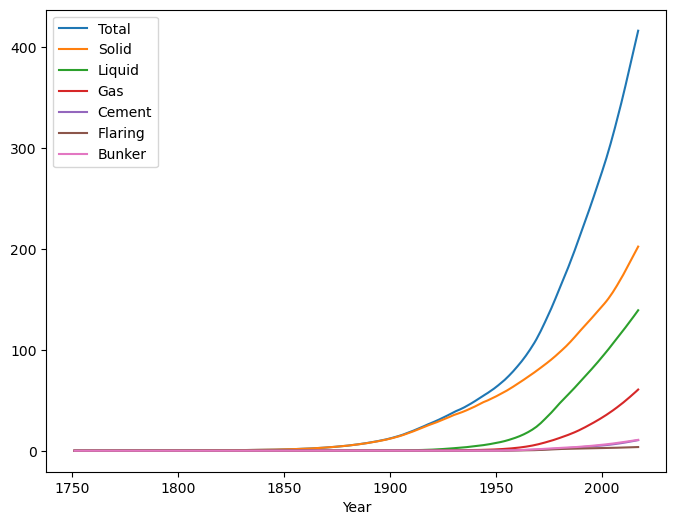

In [179]:
#And group by year and sum to get total global emissions!:
########
df_world = df_cumulative.groupby(by = 'Year').sum()

#Now when we plot, it looks correct!
df_world = df_world.reset_index()

df_world.plot(x = 'Year', figsize=(8,6))


### Plotting With Pandas

Can specify `kind` argument to `plot()` method, with options:

- `bar` or `barh` for bar plots

- `hist` for histogram

- `box` for boxplot

- `kde` or `density` for density plots

- `area` for area plots

- `scatter` for scatter plots

- `hexbin` for hexagonal bin plots

- `pie` for pie plots

In [184]:
#Again, get global emissions
df = get_carbon_df()

#We'll drop Per_Capita and Total:
df_total = df.groupby(by = ['Year']).sum().reset_index().drop(columns=['Per_Capita', 'Total'])
df_total.head()

,Year,Solid,Liquid,Gas,Cement,Flaring,Bunker
0,1751,2552.0,0.0,0.0,0,0.0,0
1,1752,2553.0,0.0,0.0,0,0.0,0
2,1753,2553.0,0.0,0.0,0,0.0,0
3,1754,2554.0,0.0,0.0,0,0.0,0
4,1755,2555.0,0.0,0.0,0,0.0,0


In [185]:
#Convert Year to a datetime first:
#import datetime
#from matplotlib.dates import DateFormatter

#Let's get our datetime array:
x = pd.to_datetime(df_total['Year'].values.astype(str), format="%Y")
x

DatetimeIndex(['1751-01-01', '1752-01-01', '1753-01-01', '1754-01-01',
               '1755-01-01', '1756-01-01', '1757-01-01', '1758-01-01',
               '1759-01-01', '1760-01-01',
               ...
               '2008-01-01', '2009-01-01', '2010-01-01', '2011-01-01',
               '2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01',
               '2016-01-01', '2017-01-01'],
              dtype='datetime64[ns]', length=267, freq=None)

In [186]:
#And overwrite Year in our DataFrame:
df_total['Year'] = x

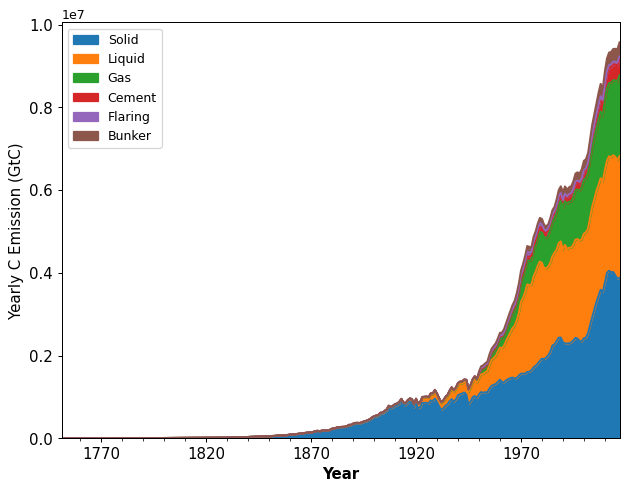

In [187]:
#Let's do an area plot: Global emissions time-series
#######

fig1, ax1 = plt.subplots(1,1, figsize=(8,6), dpi=90)

df_total.plot(x = 'Year', kind = 'area', ax = ax1)

#Let's set labels and fontsizes:
fs = 12
ax1.set_xlabel('Year', fontsize=fs, fontweight='bold')
ax1.set_ylabel('Yearly C Emission (GtC)', fontsize=fs)

ax1.tick_params(axis='both', labelsize=fs)


<AxesSubplot: xlabel='Year'>

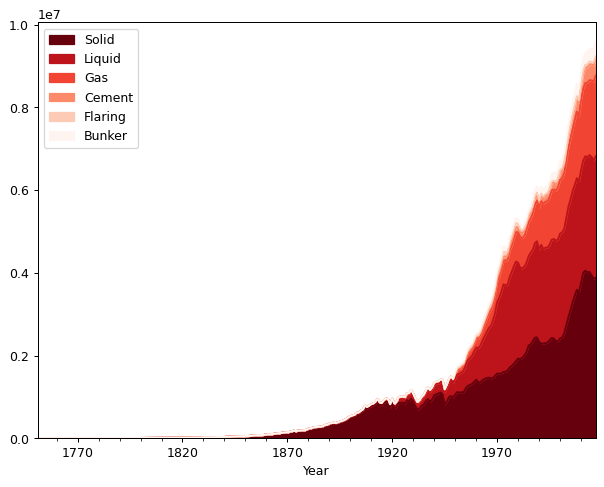

In [188]:
fig1, ax1 = plt.subplots(1,1, figsize=(8,6), dpi=90)

#Plot: Can change the colormap to various options:
df_total.plot(x = 'Year', kind = 'area', ax = ax1, cmap='Reds_r')

<AxesSubplot: xlabel='Year'>

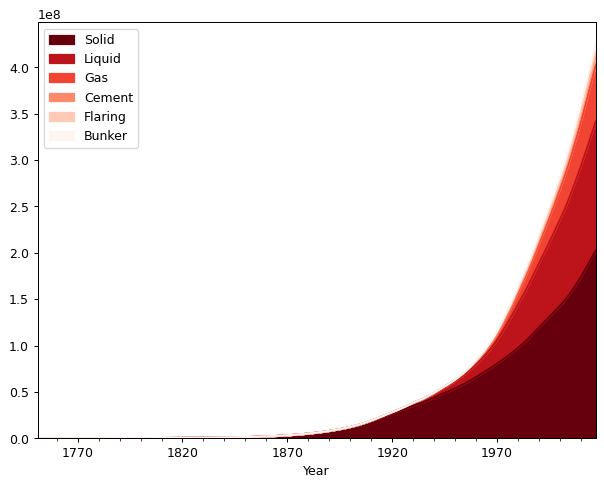

In [189]:
#And cumsum:
fig1, ax1 = plt.subplots(1,1, figsize=(8,6), dpi=90)

df_cumulative = df_total.copy()

#Let's preserve year here:
df_cumulative.iloc[:,1:] = df_total.iloc[:,1:].cumsum()

#And plot:
df_cumulative.plot(x = 'Year', kind = 'area', ax = ax1, cmap='Reds_r')

### Finally, melt + a pie chart...

- Let's show the relative contributions of each fuel as a pie chart
- Restrict to last year:

In [195]:
#Let's get a DataFrame that is just our last year
final_emissions = df_cumulative.iloc[-1:-2:-1]

final_emissions

,Year,Solid,Liquid,Gas,Cement,Flaring,Bunker
266,2017-01-01,202353533.0,139231103.0,60639831.0,10479518,3641018.0,10772314


We'd like to make a pie chart showing the relative contributions of each fossil type, but pie() takes a single column as the `y` argument

Let's `melt`:

In [197]:
#Melt:
df_long = pd.melt(final_emissions, id_vars=['Year'], value_vars=final_emissions.columns[1:7],
        var_name='Category', value_name='Emissions')

df_long

,Year,Category,Emissions
0,2017-01-01,Solid,202353533.0
1,2017-01-01,Liquid,139231103.0
2,2017-01-01,Gas,60639831.0
3,2017-01-01,Cement,10479518.0
4,2017-01-01,Flaring,3641018.0
5,2017-01-01,Bunker,10772314.0


<AxesSubplot: ylabel='Emissions'>

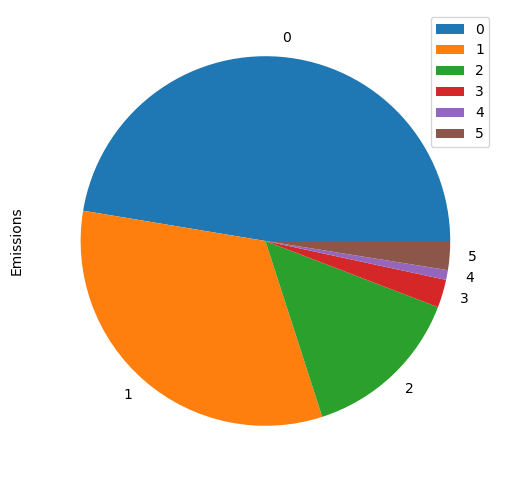

In [198]:
#Plot make our much anticipated pie chart:
df_long.plot.pie(y = 'Emissions', figsize=(6,6))

#Gah! Labels are all wrong

In [199]:
#To fix, let's set our index:
df_long = df_long.set_index('Category')

df_long

,Year,Emissions
Category,,
Solid,2017-01-01,202353533.0
Liquid,2017-01-01,139231103.0
Gas,2017-01-01,60639831.0
Cement,2017-01-01,10479518.0
Flaring,2017-01-01,3641018.0
Bunker,2017-01-01,10772314.0


Text(0, 0.5, 'Emissions')

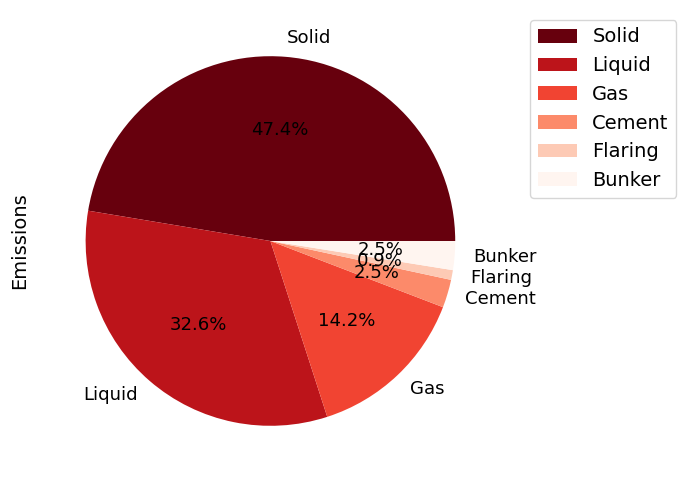

In [200]:
#Plot our even more anticipated pie chart:
fig1, ax1 = plt.subplots(1,1, figsize=(6,6))

df_long.plot.pie(y = 'Emissions', fontsize=13, ax=ax1, cmap='Reds_r', autopct='%.1f%%')

#Some more aesthetics
ax1.legend(fontsize=14, loc='upper right', bbox_to_anchor=(1.4, 1))
ax1.set_ylabel('Emissions', fontsize=14)
